In [15]:
import seaborn as sns
import pandas as pd

In [16]:
df = pd.read_csv('enhanced_classified_emails.csv')

In [17]:
df.head()

,subject,sender,date,body,formality,formality_ratio,language,day_of_week,hour,body_length,word_count,topic,topic_confidence,is_just_visual
0,Adobe Scan 25 Haz 2024.pdf,=?UTF-8?B?QXJkYSBBeWTEsW4gKFN0dWRlbnQp?= <aydi...,2024-06-25 17:08:53+00:00,Adobe Scan 25 Haz 2024.pdf: https://acrobat.ad...,Formal,4.961067,tr,Tuesday,17,159,12,Empty,1.000000,True
1,Broken showerhead,=?UTF-8?B?QXJkYSBBeWTEsW4gKFN0dWRlbnQp?= <aydi...,2024-08-19 10:08:41+00:00,"Dear janitor, My name is Arda Aydın. I live in...",Informal,0.878757,en,Monday,10,209,42,Accommodation,0.726538,False
2,=?UTF-8?B?UmU6IEwnT3LDqWFsIFTDvHJraXllIHwgRm90...,=?UTF-8?B?QXJkYSBBeWTEsW4gKFN0dWRlbnQp?= <aydi...,2024-11-29 07:04:27+00:00,NaN,Formal,1.107135,th,Friday,7,0,0,Empty,1.000000,False
3,\n =?utf-8?B?TCdPcsOpYWwgVMO8cmtpeWUgfCBGb3Rvx...,SAHIN Gulben <gulben.sahin@loreal.com>,2024-11-29 06:05:23+00:00,NaN,Formal,1.107135,th,Friday,6,0,0,Empty,1.000000,False
4,Meldung 10 and money transfer for enrollment,=?UTF-8?B?QXJkYSBBeWTEsW4gKFN0dWRlbnQp?= <aydi...,2024-03-20 20:19:55+00:00,"Hello dear exchange students team, I would lik...",Formal,2.849389,en,Wednesday,20,446,79,Academic,0.322573,False


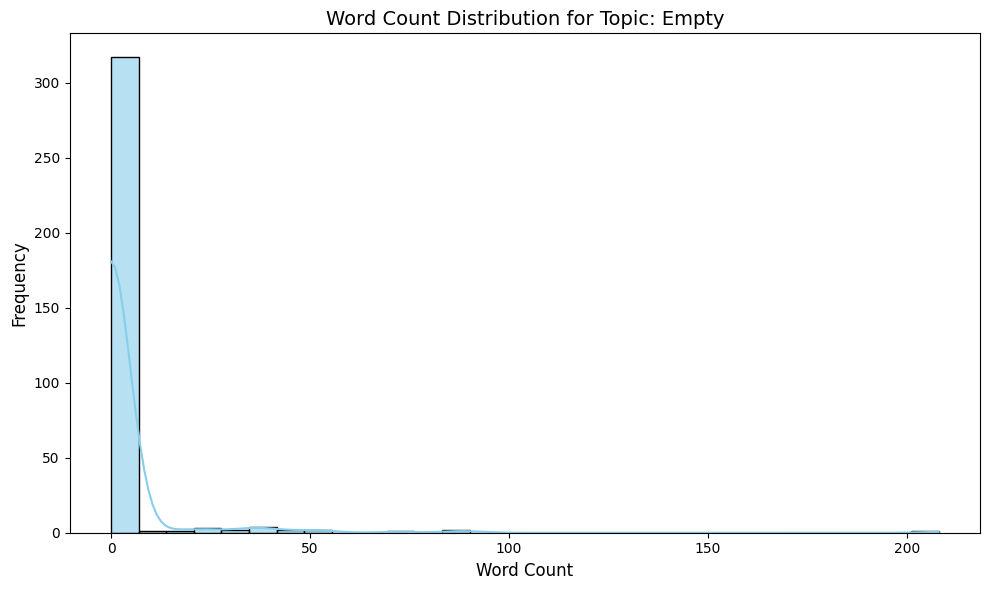

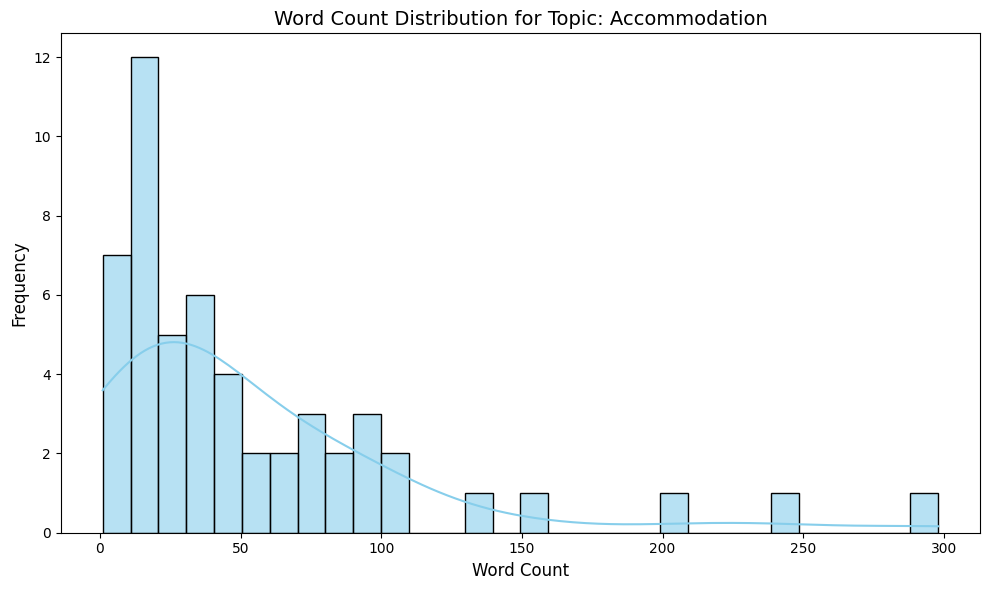

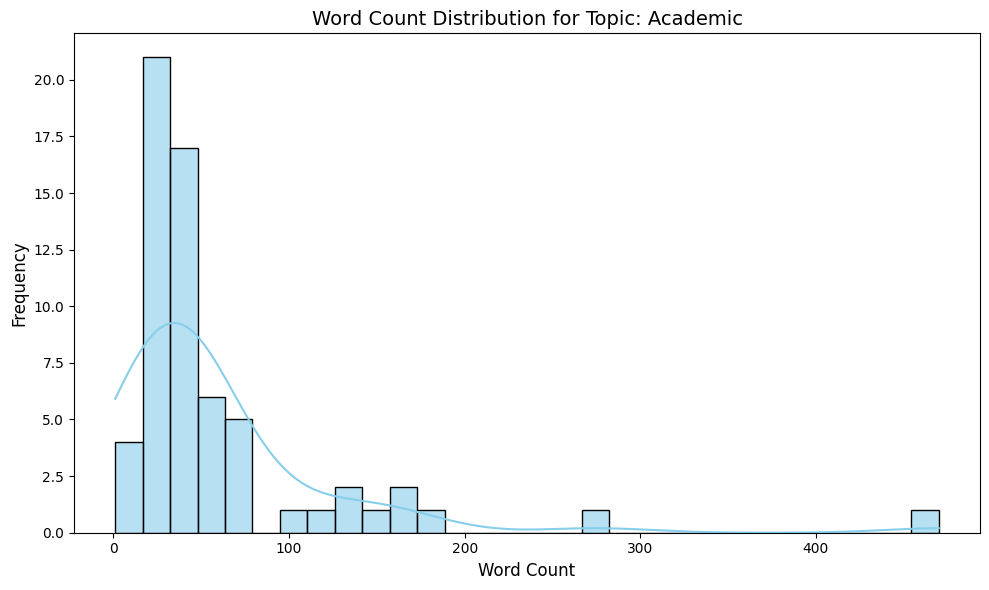

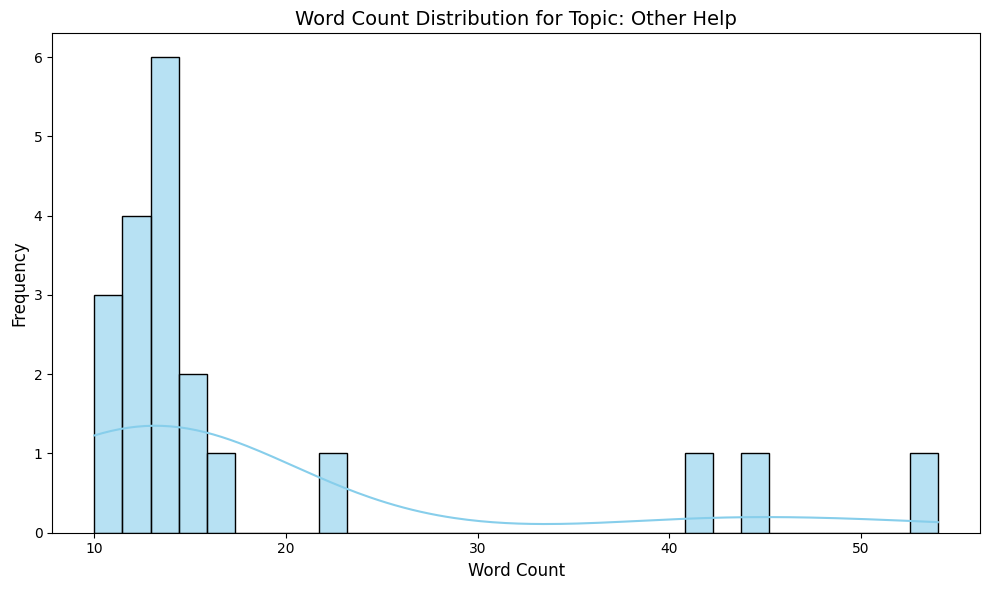

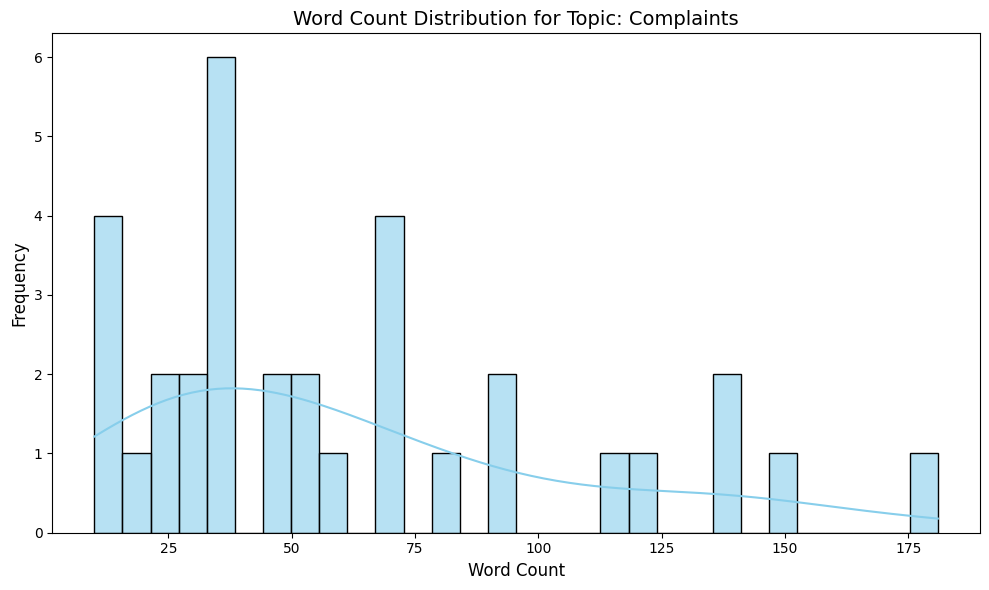

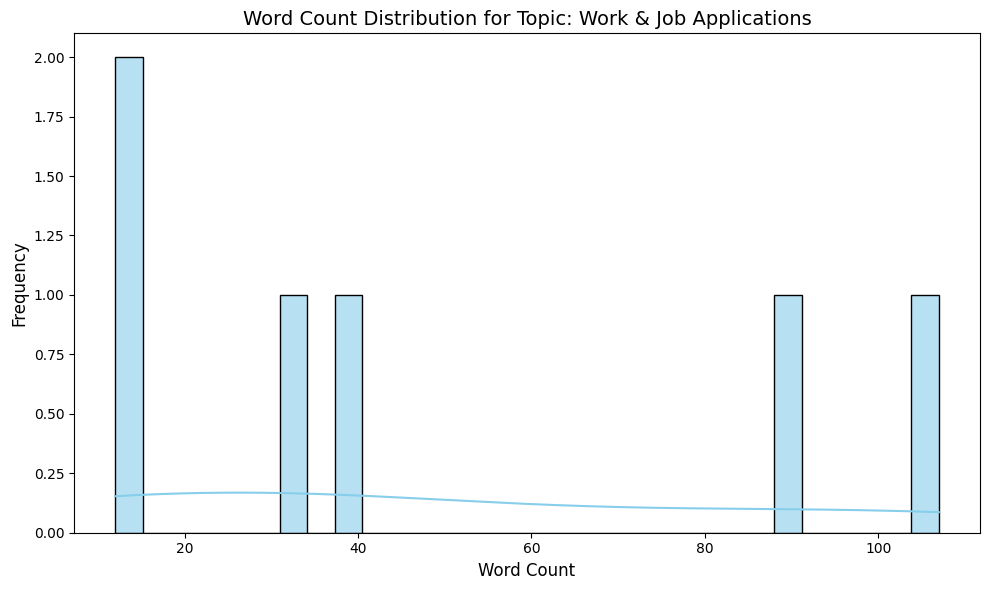

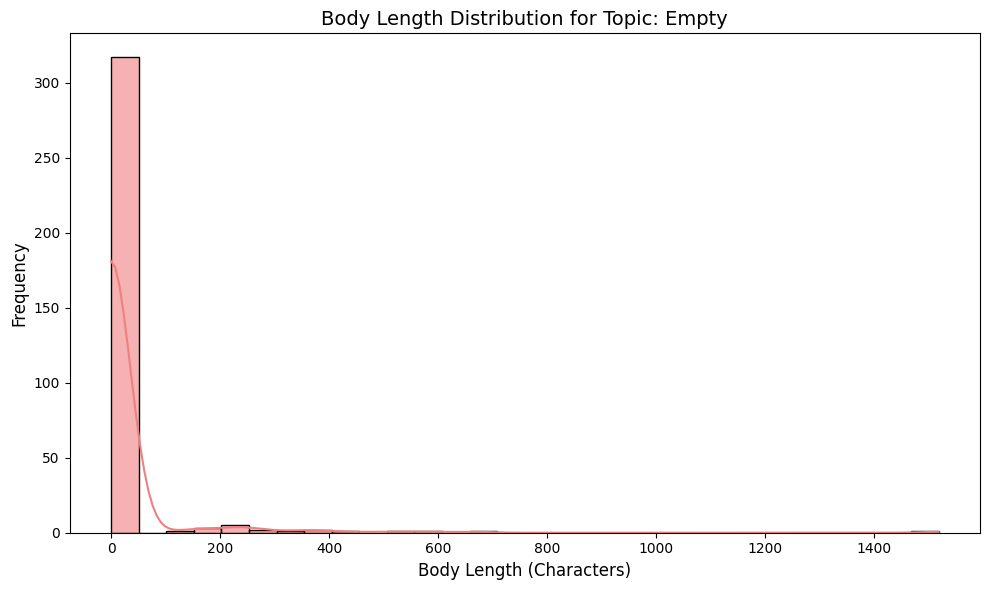

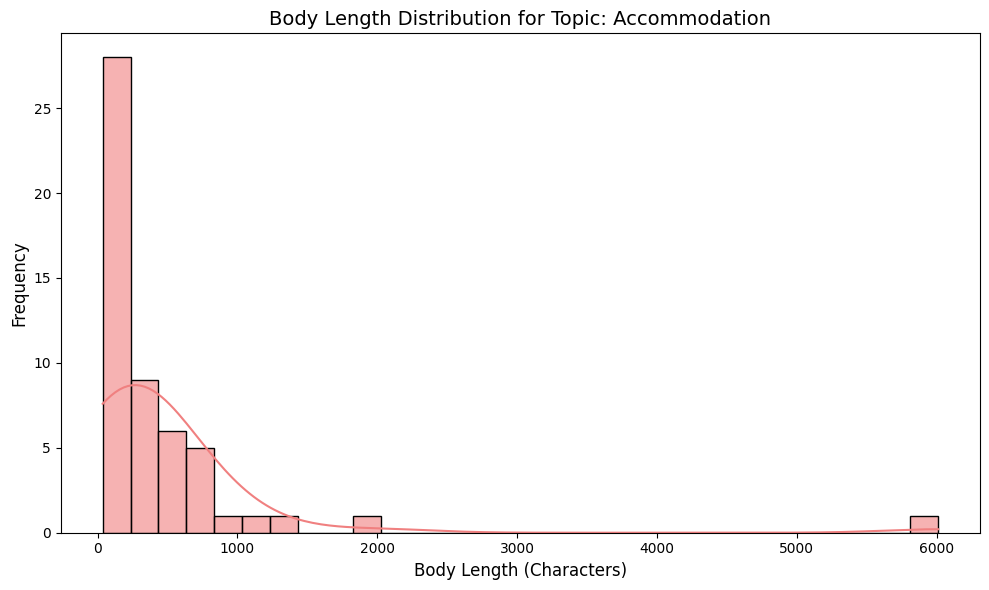

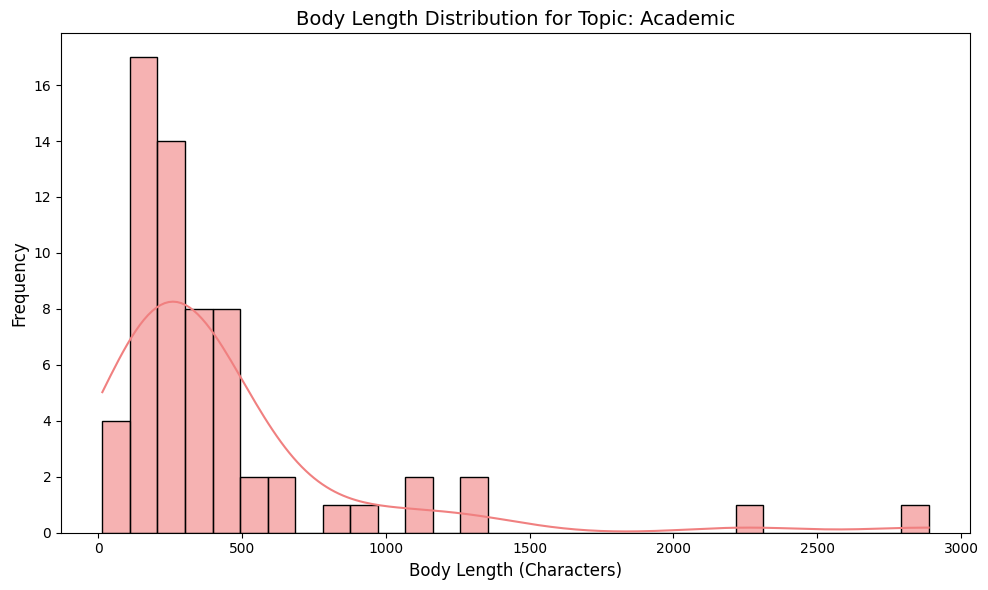

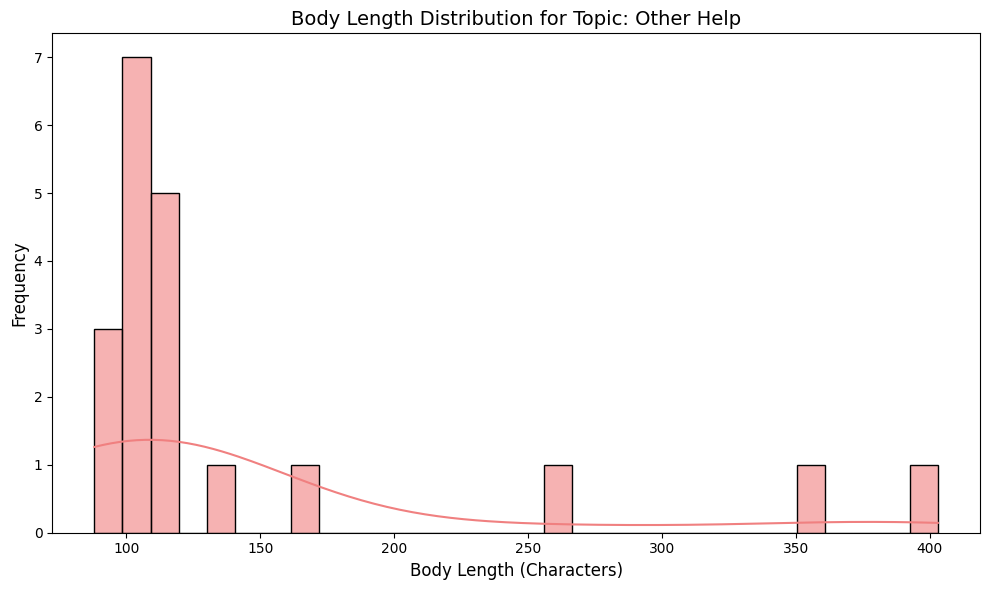

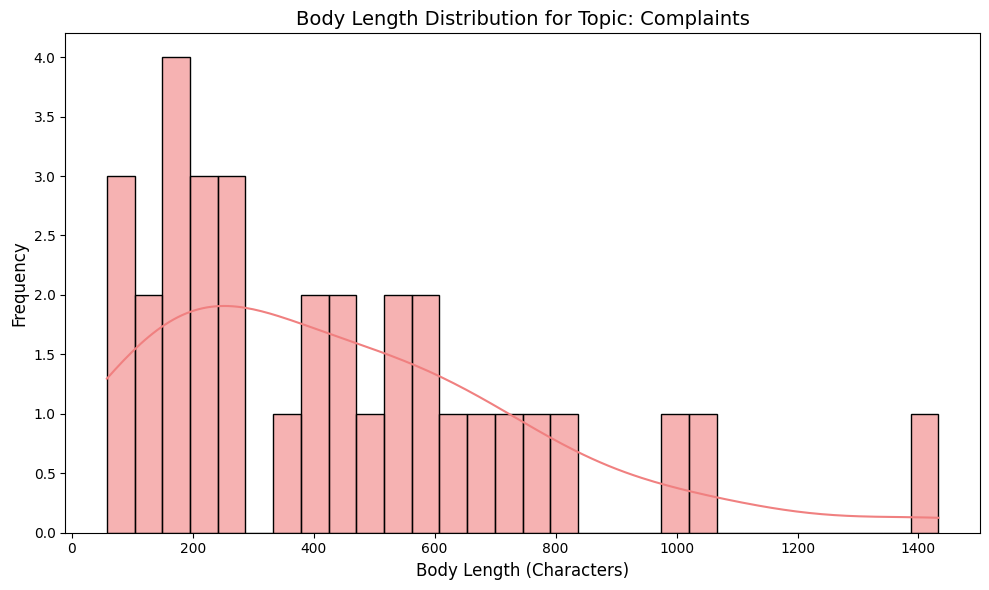

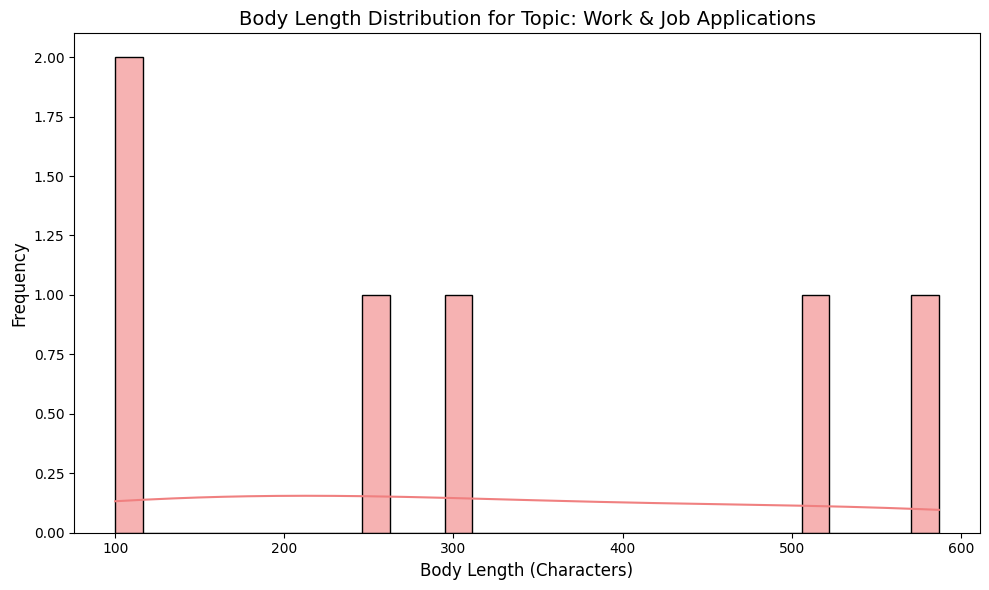

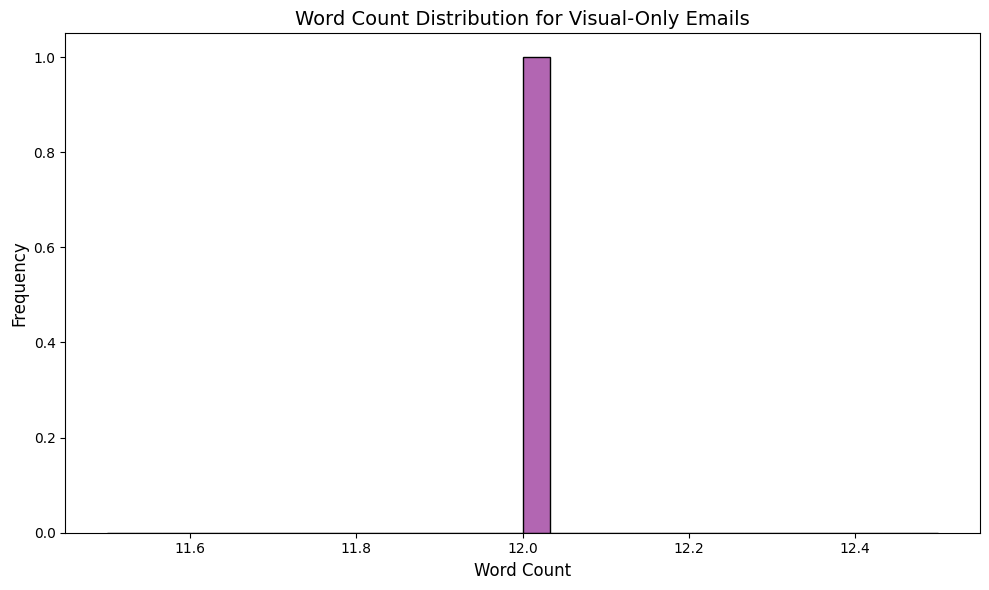

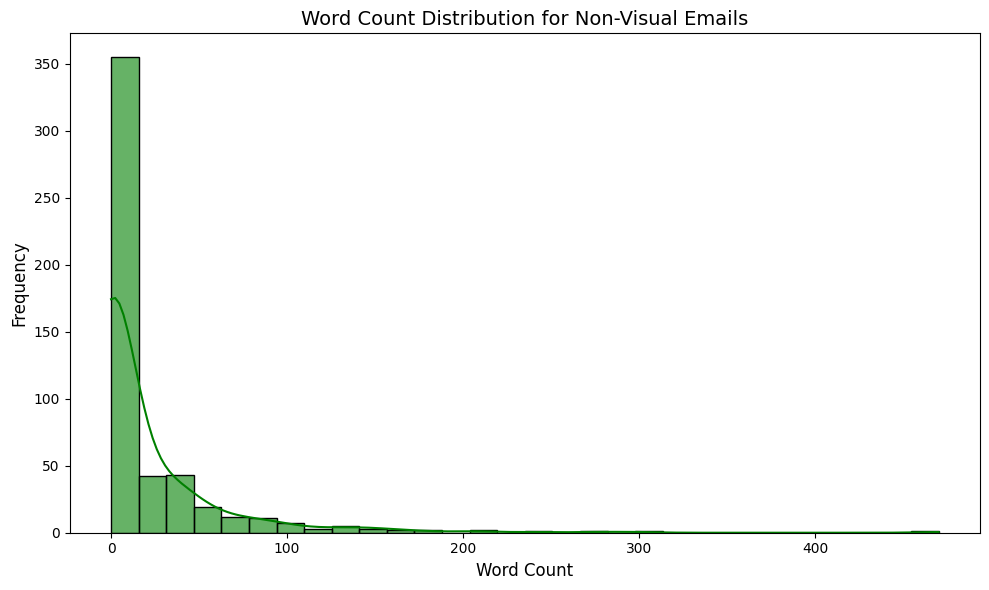

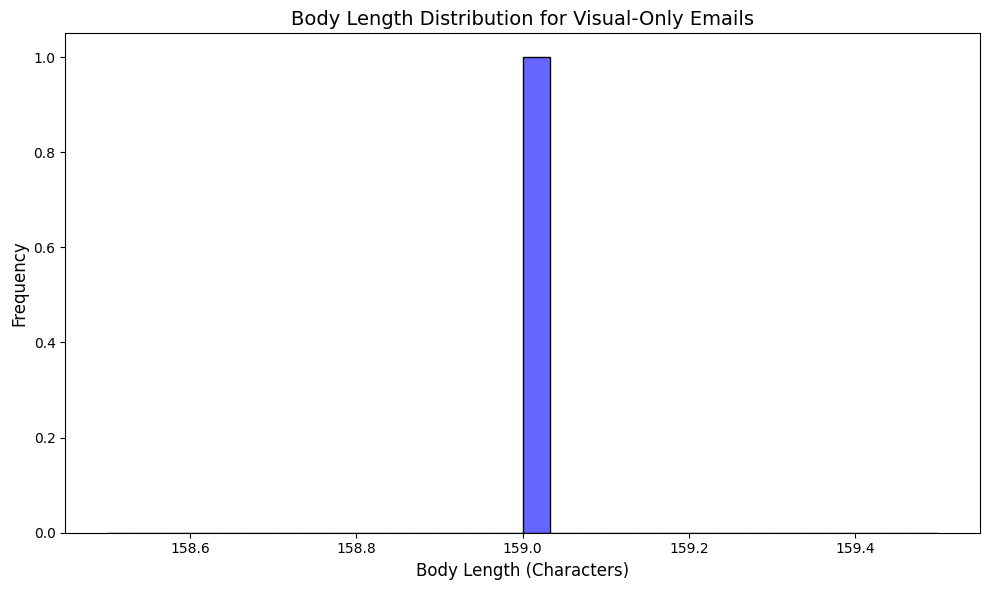

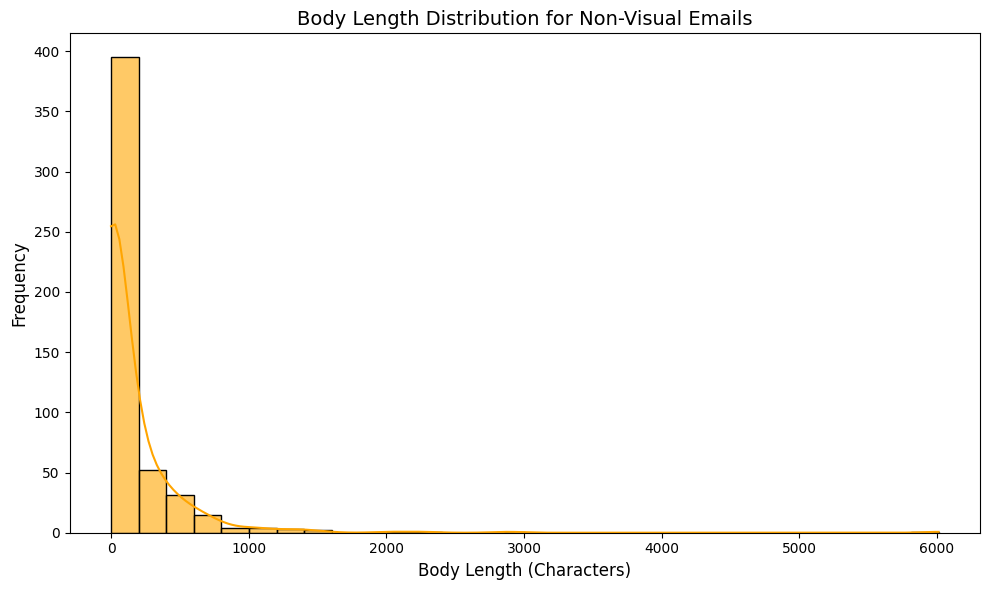

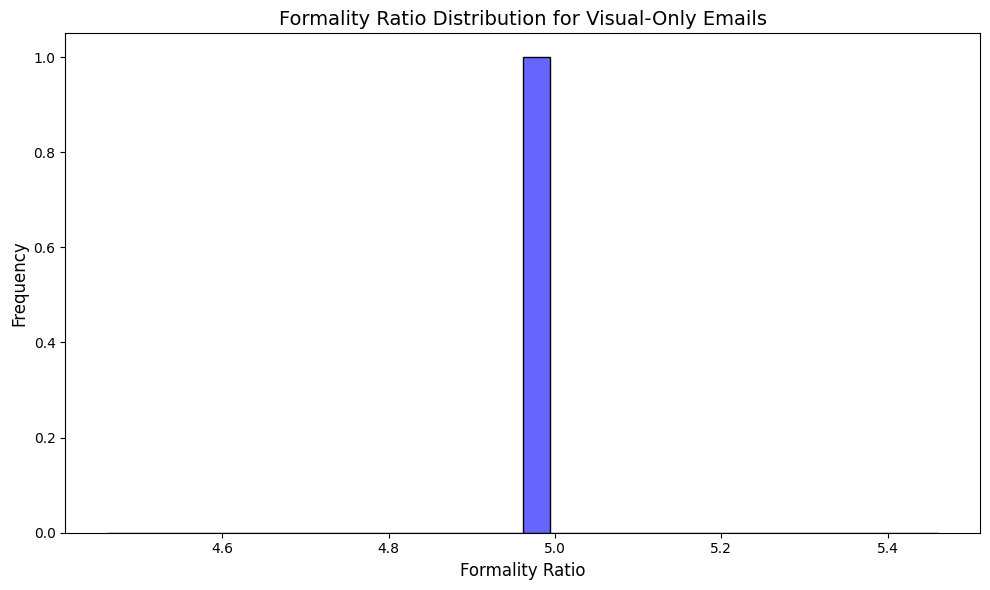

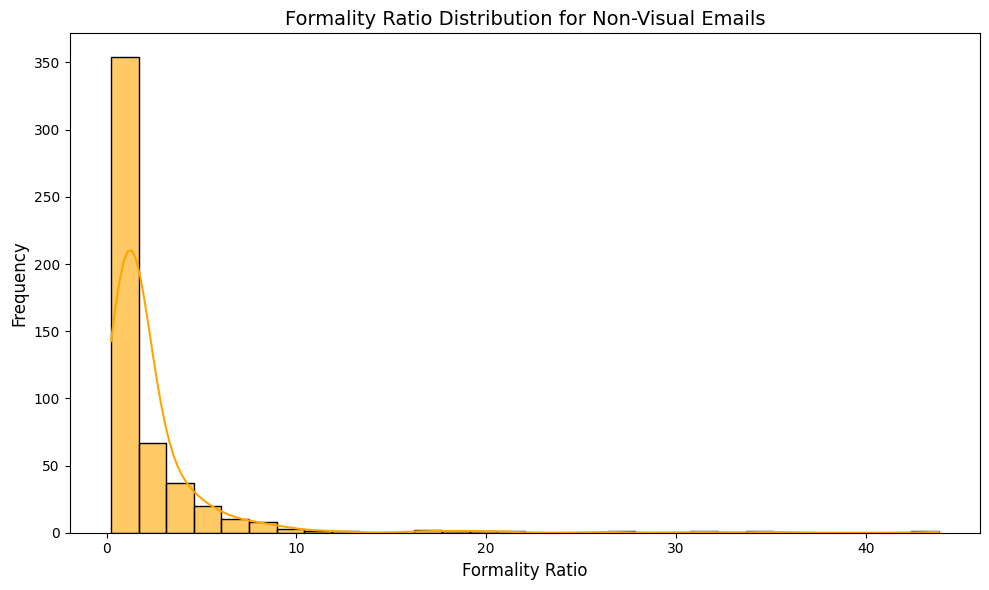

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the directory to save plots
import os
os.makedirs('plots', exist_ok=True)

# Distribution of word count by topic (separate visualizations)
if 'word_count' in df.columns:
    unique_topics = df['topic'].unique()
    for topic in unique_topics:
        plt.figure(figsize=(10, 6))
        sns.histplot(
            data=df[df['topic'] == topic],
            x='word_count',
            kde=True,
            bins=30,
            color='skyblue',
            alpha=0.6
        )
        plt.title(f'Word Count Distribution for Topic: {topic}', fontsize=14)
        plt.xlabel('Word Count', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.tight_layout()
        plt.savefig(f'plots/word_count_{topic}.png')  # Save the plot
        plt.show()

# Distribution of body length by topic (separate visualizations)
if 'body_length' in df.columns:
    unique_topics = df['topic'].unique()
    for topic in unique_topics:
        plt.figure(figsize=(10, 6))
        sns.histplot(
            data=df[df['topic'] == topic],
            x='body_length',
            kde=True,
            bins=30,
            color='lightcoral',
            alpha=0.6
        )
        plt.title(f'Body Length Distribution for Topic: {topic}', fontsize=14)
        plt.xlabel('Body Length (Characters)', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.tight_layout()
        plt.savefig(f'plots/body_length_{topic}.png')  # Save the plot
        plt.show()

# Distribution of word count for visual-only and non-visual emails
if 'word_count' in df.columns and 'is_just_visual' in df.columns:
    for is_visual in [True, False]:
        plt.figure(figsize=(10, 6))
        subset = df[df['is_just_visual'] == is_visual]
        label = 'Visual-Only Emails' if is_visual else 'Non-Visual Emails'
        sns.histplot(
            data=subset,
            x='word_count',
            kde=True,
            bins=30,
            color='purple' if is_visual else 'green',
            alpha=0.6
        )
        plt.title(f'Word Count Distribution for {label}', fontsize=14)
        plt.xlabel('Word Count', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.tight_layout()
        plt.savefig(f'plots/word_count_{label.replace(" ", "_")}.png')  # Save the plot
        plt.show()

# Distribution of body length for visual-only and non-visual emails
if 'body_length' in df.columns and 'is_just_visual' in df.columns:
    for is_visual in [True, False]:
        plt.figure(figsize=(10, 6))
        subset = df[df['is_just_visual'] == is_visual]
        label = 'Visual-Only Emails' if is_visual else 'Non-Visual Emails'
        sns.histplot(
            data=subset,
            x='body_length',
            kde=True,
            bins=30,
            color='blue' if is_visual else 'orange',
            alpha=0.6
        )
        plt.title(f'Body Length Distribution for {label}', fontsize=14)
        plt.xlabel('Body Length (Characters)', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.tight_layout()
        plt.savefig(f'plots/body_length_{label.replace(" ", "_")}.png')  # Save the plot
        plt.show()

# Distribution of body length for visual-only and non-visual emails
if 'formality_ratio' in df.columns and 'is_just_visual' in df.columns:
    for is_visual in [True, False]:
        plt.figure(figsize=(10, 6))
        subset = df[df['is_just_visual'] == is_visual]
        label = 'Visual-Only Emails' if is_visual else 'Non-Visual Emails'
        sns.histplot(
            data=subset,
            x='formality_ratio',
            kde=True,
            bins=30,
            color='blue' if is_visual else 'orange',
            alpha=0.6
        )
        plt.title(f'Formality Ratio Distribution for {label}', fontsize=14)
        plt.xlabel('Formality Ratio', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.tight_layout()
        plt.savefig(f'plots/formality_ratio_{label.replace(" ", "_")}.png')  # Save the plot
        plt.show()

In [23]:
def mode_or_none(series):
    """Return the first mode if it exists, otherwise None."""
    mode_series = series.mode()
    return mode_series.iloc[0] if not mode_series.empty else None

summary_df = df.groupby('topic').agg(
    avg_word_count=('word_count', 'mean'),
    std_word_count=('word_count', 'std'),
    avg_hour=('hour', 'mean'),
    std_hour=('hour', 'std'),
    avg_body_length=('body_length', 'mean'),
    std_body_length=('body_length', 'std'),
    avg_formality_ratio=('formality_ratio', 'mean'),
    std_formality_ratio=('formality_ratio', 'std'),
    
    # For day_of_week, let's return the most common (mode).
    # If your day_of_week is numeric, you can also do mean or std.
    most_common_day_of_week=('day_of_week', mode_or_none)
).reset_index()

In [24]:
numeric_cols = [
    'avg_word_count', 'std_word_count',
    'avg_hour', 'std_hour',
    'avg_body_length', 'std_body_length',
    'avg_formality_ratio', 'std_formality_ratio'
]
summary_df[numeric_cols] = summary_df[numeric_cols].round(2)

In [25]:
summary_df.to_excel("topic_summary.xlsx", index=False)

print("Summary saved to topic_summary.xlsx")
print(summary_df)

Summary saved to topic_summary.xlsx
                     topic  avg_word_count  std_word_count  avg_hour  \
0                 Academic           59.63           71.48     12.73   
1            Accommodation           54.91           59.87     12.00   
2               Complaints           61.91           44.74     11.58   
3                    Empty            2.88           15.49     12.30   
4               Other Help           18.45           12.60     15.60   
5  Work & Job Applications           49.00           40.14     10.67   

   std_hour  avg_body_length  std_body_length  avg_formality_ratio  \
0      4.68           431.16           485.45                 4.00   
1      4.59           471.55           855.66                 4.03   
2      4.53           442.12           319.51                 5.85   
3      4.78            21.29           112.94                 1.42   
4      4.38           145.20            89.37                 2.49   
5      1.97           313.83           

In [10]:
def remove_outliers_iqr(group: pd.DataFrame, columns: list):
    """
    Removes outliers from each 'column' in 'columns' using the IQR method,
    within a single topic group.
    """
    for col in columns:
        # Skip columns that aren't in the DataFrame or have all NaNs
        if col not in group.columns or group[col].dropna().empty:
            continue
        
        Q1 = group[col].quantile(0.25)
        Q3 = group[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        group = group[group[col].between(lower_bound, upper_bound, inclusive="both")]

    return group


In [27]:
numeric_cols = ["word_count", "body_length", "formality_ratio"]  # adapt as needed

# Group by 'topic' and remove outliers within each group
df_no_outliers = (
    df
    .groupby("topic", group_keys=False)
    .apply(lambda g: remove_outliers_iqr(g, numeric_cols))
)

# --------------------------------------------------------
# 4. Recalculate your summary stats
# --------------------------------------------------------
# For 'day_of_week', we might take the most common (mode).
def mode_or_none(series):
    mode_series = series.mode()
    return mode_series.iloc[0] if not mode_series.empty else None

summary_df = df_no_outliers.groupby('topic').agg(
    avg_word_count=('word_count', 'mean'),
    std_word_count=('word_count', 'std'),
    avg_hour=('hour', 'mean'),
    std_hour=('hour', 'std'),
    avg_body_length=('body_length', 'mean'),
    std_body_length=('body_length', 'std'),
    most_common_day_of_week=('day_of_week', mode_or_none),
    avg_formality_ratio=('formality_ratio', 'mean'),
    std_formality_ratio=('formality_ratio', 'std'),

).reset_index()

# Round numeric columns for readability
numeric_stats = ['avg_word_count','std_word_count','avg_hour','std_hour','avg_body_length','std_body_length', 'avg_formality_ratio', 'std_formality_ratio']
summary_df[numeric_stats] = summary_df[numeric_stats].round(2)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17072\4208366163.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: remove_outliers_iqr(g, numeric_cols))


In [28]:
summary_df.to_excel("topic_summary_no_outliers_IQR.xlsx", index=False)
print("Outliers removed per topic. Summary stats saved to topic_summary_no_outliers_IQR.xlsx.")
print(summary_df)

Outliers removed per topic. Summary stats saved to topic_summary_no_outliers_IQR.xlsx.
                     topic  avg_word_count  std_word_count  avg_hour  \
0                 Academic           36.62           19.97     12.00   
1            Accommodation           41.02           32.30     12.36   
2               Complaints           56.90           38.68     11.41   
3                    Empty            0.00            0.00     12.34   
4               Other Help           12.67            1.45     16.80   
5  Work & Job Applications           55.50           50.14     11.50   

   std_hour  avg_body_length  std_body_length most_common_day_of_week  \
0      4.57           265.54           127.74               Wednesday   
1      4.66           297.64           227.00                  Monday   
2      4.70           403.45           257.06                Thursday   
3      4.79             0.00             0.00                 Tuesday   
4      2.65           104.80             8.

In [29]:
df_no_outliers.to_excel("cleaned_data_no_outliers_IQR.xlsx", index=False)
